In [14]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt

In [26]:
file_path = './CSV/dependenciesDetails'

list_high = []
list_mid = []
list_low = []

for file in os.listdir(file_path):
    if file.endswith(".csv"):
        prefix = int(file[:4])

        #for artifacts having more than 25000 dependents
        if 1 <= prefix <= 11:
            list_high.append(file)

        #for artifacts having dependents between 1000 to 5000
        elif 89 <= prefix <= 458:
            list_mid.append(file)

        #for artifacts having dependents between 100 to 500
        elif prefix >= 957:
            list_low.append(file)
    
    

In [27]:
def depDetails(df):
    df['dependencyArtIDs'] = df['dependencyArtIDs'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


    df['releaseDate'] = df['releaseDate'].str.strip('"')
    df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['releaseDate'].dt.year
    
    df['addedDependency'] = 0
    df['removedDependency'] = 0
    
    df.at[0, 'addedDependency'] = len(set(df.loc[0, 'dependencyArtIDs']))
    
    for i in range(1, len(df)):
        #print(i)
        prev_dependency = set(df.loc[i-1, 'dependencyArtIDs'])
        #print(prev_dependency)
        curr_dependency = set(df.loc[i, 'dependencyArtIDs'])
        # print(curr_dependency)
    
        added_dep = curr_dependency - prev_dependency
        removed_dep = prev_dependency - curr_dependency
        
        df.at[i, 'addedDependency'] = len(added_dep)
        df.at[i, 'removedDependency'] = len(removed_dep)
    
    data = df[['year', 'addedDependency', 'removedDependency']]

    return data

In [28]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

In [29]:
for file in list_high:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df1 = pd.concat([df1,df], ignore_index = True)

for file in list_mid:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df2 = pd.concat([df2,df], ignore_index = True)

for file in list_low:
    temp_df = pd.read_csv(os.path.join(file_path,file))
    df = depDetails(temp_df)
    df3 = pd.concat([df3,df], ignore_index = True)

In [30]:
df1

,year,addedDependency,removedDependency
0,2011,1,0
1,2011,0,0
2,2012,0,0
3,2012,0,0
4,2014,0,0
...,...,...,...
1239,2021,1,0
1240,2023,1,0
1241,2023,0,0
1242,2024,0,0


In [31]:
yearly_data1 = df1.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data1)

    year  addedDependency  removedDependency
0   2006                8                  0
1   2007                2                  0
2   2008                9                  2
3   2009                3                  1
4   2010                7                  0
5   2011                6                  0
6   2012               14                  9
7   2013                2                  1
8   2014                2                  1
9   2015               25                 20
10  2016                9                  7
11  2017               20                 17
12  2018               19                 15
13  2019               24                 24
14  2020               34                 35
15  2021               64                 67
16  2022               53                 53
17  2023               87                 83
18  2024               31                 31


In [32]:
yearly_data2 = df2.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data2)

    year  addedDependency  removedDependency
0   2006               28                 14
1   2007               31                  5
2   2008                5                  5
3   2009               11                 12
4   2010               20                 16
5   2011               29                 21
6   2012               71                 83
7   2013               43                 33
8   2014               11                  9
9   2015                1                  3
10  2016                8                  3
11  2017               11                  7
12  2018                8                  7
13  2019               13                  8
14  2020               24                 25
15  2021               18                 15
16  2022               26                 21
17  2023               23                 26
18  2024                7                 10


In [33]:
yearly_data3 = df3.groupby('year')[['addedDependency', 'removedDependency']].sum().reset_index()

print(yearly_data3)

    year  addedDependency  removedDependency
0   2013                5                  0
1   2014                4                  0
2   2015                2                  0
3   2016                1                  0
4   2017               14                  1
5   2018               11                  2
6   2019                3                  3
7   2020               14                  4
8   2021                6                  6
9   2022                6                  5
10  2023                3                  3
11  2024               20                 19


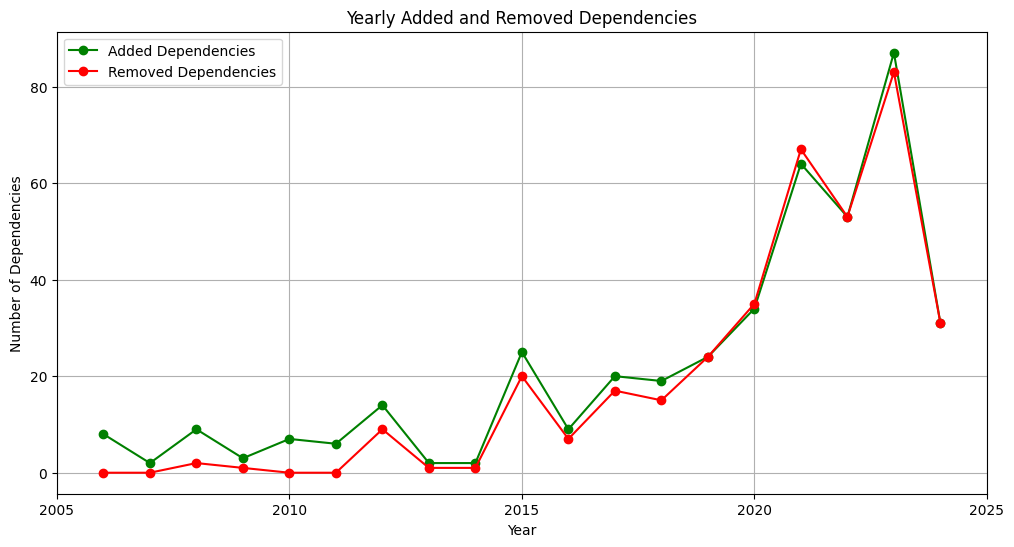

In [34]:
unique_years = sorted(yearly_data1['year'].unique())

start_year = unique_years[0]-1  
end_year = unique_years[-1]+1 
year_intervals = list(range(start_year, end_year + 1, 5))

plt.figure(figsize = (12,6))
plt.plot(yearly_data1['year'],yearly_data1['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data1['year'],yearly_data1['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()

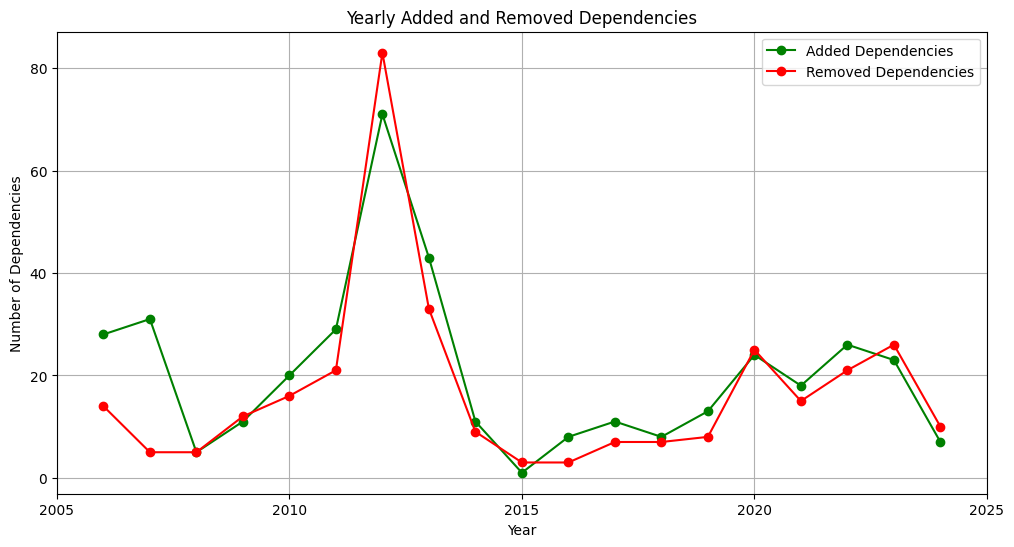

In [35]:
unique_years = sorted(yearly_data2['year'].unique())

start_year = unique_years[0]-1  
end_year = unique_years[-1]+1 
year_intervals = list(range(start_year, end_year + 1, 5))

plt.figure(figsize = (12,6))
plt.plot(yearly_data2['year'],yearly_data2['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data2['year'],yearly_data2['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.xlim([start_year, end_year])
plt.xticks(year_intervals)

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()

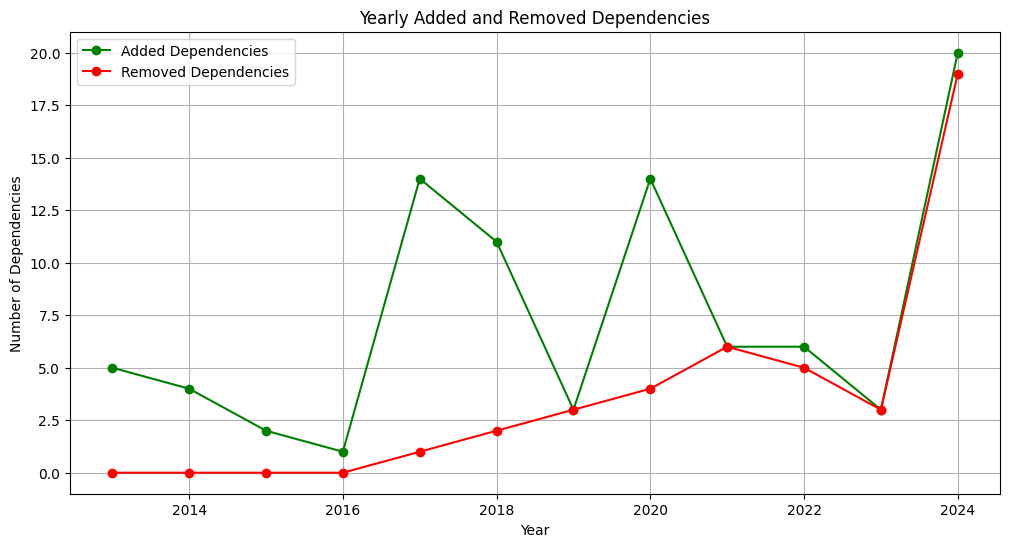

In [36]:
plt.figure(figsize = (12,6))
plt.plot(yearly_data3['year'],yearly_data3['addedDependency'], marker='o', label='Added Dependencies', color='green')
plt.plot(yearly_data3['year'],yearly_data3['removedDependency'], marker='o', label='Removed Dependencies', color='red')

plt.title('Yearly Added and Removed Dependencies')
plt.xlabel('Year')
plt.ylabel('Number of Dependencies')
plt.legend()
plt.grid(True)
plt.show()